#### LangChain vs LangGraph (feat. LangGraph 개념 설명)
* LangGraph의 개념과 주요 기능을 이해하고, 차이점을 비교합니다.

In [1]:
from dotenv import load_dotenv
import os

load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
print(OPENAI_API_KEY[:2])

UPSTAGE_API_KEY = os.getenv("UPSTAGE_API_KEY")
print(UPSTAGE_API_KEY[30:])

sk
Fy


In [2]:
# from langchain_openai import ChatOpenAI

# llm = ChatOpenAI(model='gpt-4o-mini') # 테스트의 경우에는 작은 모델을 사용합니다

from langchain_upstage import ChatUpstage
llm = ChatUpstage(
        model="solar-pro",
        base_url="https://api.upstage.ai/v1",
        temperature=0.5
    )
print(llm)

query = 'LangGraph는 무엇인가요?'
llm.invoke(query)



c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\mylangchain-app-SBe-Yh6W-py3.12\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


client=<openai.resources.chat.completions.completions.Completions object at 0x0000027FCABB0D70> async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000027FCC48FC80> model_name='solar-pro' temperature=0.5 model_kwargs={} upstage_api_key=SecretStr('**********') upstage_api_base='https://api.upstage.ai/v1'


AIMessage(content='**LangGraph**는 대규모 언어 모델(LLM)을 기반으로 한 **상태 관리(stateful) 멀티모달 애플리케이션**을 구축하기 위한 오픈소스 프레임워크입니다. LangChain 팀을 주도로 개발되었으며, 복잡한 대화형 시스템(예: 챗봇, 에이전트, 워크플로우 자동화)을 설계할 때 **그래프 기반의 상태 추적**과 **모듈식 구성**을 제공합니다.\n\n### 주요 특징\n1. **그래프 기반 상태 관리**  \n   - LLM의 대화 흐름을 **노드(Node)와 엣지(Edge)**로 구성된 그래프로 표현합니다.  \n   - 각 노드는 특정 작업(예: LLM 호출, 도구 사용)을 수행하며, 엣지는 상태 전이(transition)를 정의합니다.  \n   - 복잡한 대화에서도 **이전 컨텍스트를 유지**하며 유연한 워크플로우를 구축할 수 있습니다.\n\n2. **확장성**  \n   - LangChain의 컴포넌트(LLM, 메모리, 도구 등)와 호환되어 기존 LangChain 애플리케이션을 LangGraph로 쉽게 마이그레이션할 수 있습니다.  \n   - 사용자 정의 노드/엣지를 추가해 비즈니스 로직에 맞게 확장 가능합니다.\n\n3. **실시간 협업 지원**  \n   - 여러 사용자 또는 에이전트가 동시에 상호작용하는 시나리오(예: 협업 도구, 게임)에 적합합니다.  \n   - 상태 동기화를 통해 **동시성(concurrency)** 문제를 해결합니다.\n\n4. **도구 통합**  \n   - 외부 API, 데이터베이스, 검색 시스템 등과의 연동을 지원합니다.  \n   - 예: LLM이 검색 결과를 참조해 답변을 생성하도록 설계 가능.\n\n### 사용 사례\n- **복잡한 챗봇**: 사용자 질문에 따라 동적으로 대화 경로를 변경하는 시스템.  \n- **에이전트 워크플로우**: LLM이 여러 단계(예: 데이터 수집 → 분석 → 보고서 생성)를 거쳐 작업을 완료.  \n- **멀티플레이어 게임**: 상태 기반

#### LangGraph의 기본개념
* `state`는 LangGraph 에이전트의 state를 나타내는 데이터 구조입니다.
* `state`는 `TypedDict`를 사용하여 정의되며, 이는 Python의 타입 힌팅을 통해 구조를 명확히 합니다.
    * 간단하게 `messages`라는 필드만 있습니다.
    * 필요에 따라 다양한 값들을 활용할 수 있습니다.
* `state`는 에이전트의 동작을 결정하는 데 사용되며, 각 노드에서 state를 업데이트하거나 참조할 수 있습니다.
* `state`는 LangGraph의 노드 간에 전달되며, 에이전트의 state 전이를 관리합니다.

In [4]:
from typing import Annotated # 타입 힌트를 사용하기 위해 
from typing_extensions import TypedDict # 구조화된 딕셔너리 타입을 정의하기 위해 

from langgraph.graph.message import add_messages 
from langchain_core.messages import AnyMessage # LangChain에서 사용하는 모든 종류의 메시지(예: HumanMessage, AIMessage)

# AgentState는 에이전트의 현재 상태를 나타내는 딕셔너리 타입을 정의합니다.
# TypedDict를 사용하면 딕셔너리가 어떤 키와 값 타입을 가져야 하는지 명확하게 지정할 수 있습니다.
class AgentState(TypedDict):
    # 'messages' 키는 에이전트의 대화 기록을 저장합니다.
    # 이 목록에는 LangChain 메시지 객체(AnyMessage)가 들어갑니다.
    # LangGraph가 이 상태를 처리할 때, 새로운 메시지가 추가되면
    # 기존 메시지 목록의 끝에 자동으로 추가되도록(append) 설정합니다.
    messages: list[Annotated[AnyMessage, add_messages]]

- 위에 선언한 `AgentState`를 활용하여 `StateGraph`를 생성합니다.

In [5]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)
print(type(graph_builder))

<class 'langgraph.graph.state.StateGraph'>


- `graph`에 추가할 `node`를 생성합니다
-  `node`는 LangGraph에서 실행되는 개별적인 작업 단위를 의미합니다. 
    - 각 노드는 특정 기능을 수행하는 독립적인 컴포넌트로, 예를 들어 텍스트 생성, 데이터 처리, 또는 의사 결정과 같은 작업을 담당할 수 있습니다.
    - `node`는 기본적으로 함수(function)로 정의되고, 뒤에서 다루지만 다른 에이전트(agent)를 활용할 수도 있습니다

In [6]:
# Node 역할 하는 함수의 인자로 state 객체를 사용함 - LLM을 호출하는 노드
def generate(state: AgentState) -> AgentState:
    """
    `generate` 노드는 사용자의 질문을 받아서 응답을 생성하는 노드입니다.
    """
    messages = state['messages']
    ai_message = llm.invoke(messages)
    return {'messages': [ai_message]}

- `node`를 생성한 후에 `edge`로 연결합니다
- `edge`는 노드들 사이의 연결을 나타내며, 데이터와 제어 흐름의 경로를 정의합니다. 
    - 엣지를 통해 한 노드의 출력이 다음 노드의 입력으로 전달되어, 전체적인 워크플로우가 형성됩니다.
    - `node`와 `edge`의 조합은 방향성 그래프(Directed Graph)를 형성하며, 이를 통해 복잡한 AI 에이전트의 행동 흐름을 구조화할 수 있습니다

In [7]:
# LLM을 호출하는 generate함수를 Node로 정의함
graph_builder.add_node('generate', generate)

- 모든 그래프는 `START(시작)`와 `END(종료)`가 있습니다
    - `END`를 explicit하게 선언하지 않는 경우도 종종 있지만, 가독성을 위해 작성해주는 것을 권장합니다

In [8]:
from langgraph.graph import START, END

graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)

- `node`를 생성하고 `edge`로 연결한 후에 `compile` 메서드를 호출하여 `Graph`를 생성합니다

In [9]:
graph = graph_builder.compile()
print(type(graph))

<class 'langgraph.graph.state.CompiledStateGraph'>


- `compile` 후에는 그래프를 시각화하여 확인할 수 있습니다
- 의도한대로 그래프가 생성됐는지 확인하는 습관을 기르는 것이 좋습니다
    - `git`에서 코드 작업물을 commit하기 전에 `git diff`를 통해 변경사항을 확인하는 것과 같습니다

In [ ]:
#from IPython.display import display, Image

#display(Image(graph.get_graph().draw_mermaid_png(max_retries=5, retry_delay=2.0)))

In [10]:
# 대체 방법
mermaid_code = graph.get_graph().draw_mermaid()
print("Mermaid Code:")
print(mermaid_code)

Mermaid Code:
---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	generate(generate)
	__end__([<p>__end__</p>]):::last
	__start__ --> generate;
	generate --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



* https://mermaid.live/ 에서  mermain_code 로 직접 확인한다.

* [Graph 이미지](https://mermaidchart.com/play?utm_source=mermaid_live_editor&utm_medium=share#pako:eNpVkN1ugzAMhV8FeTetBCzQ8tO06s36CLvaMlUpOBAJAgpBWlf13RfSlq25iR2f78T2BYquRKBQad7X3vthyxQzx-NguLbX4nPX7-ds99rvv5aUUiH1YCZhhQo1N7h4BMsbjqqcYRfPaMNv5GzqBcHee-Db_6aucuddobDwcEDhlSj42BhPyKahLyIWRAi_kQqDGmVVGxqF8RPgGnbyoOt5Ic2ZkifB1Nbd7iROqSiYAt8uRZZAjR7RhxZ1y6cULkx5HgNTY4sMqA3v_TBg6mqxnquPrmsfpO7GqgYqeDPYbOxLO9tBcrvxP4kdEvVbNyoDNE2cBdALfANdkTRMo2QTJ2meb6JstfbhbJ_TMIoTQsg6yUmU5ZurDz_uUxLm2VSYT3T9BaY8oOc)


In [13]:
from langchain_core.messages import HumanMessage

query = 'LangGraph는 무엇인가요? LangChain과의 차이점은 무엇인가요?'
initial_state = {'messages': [HumanMessage(query)]}
result = graph.invoke(initial_state)

print("-"*30)
print(type(result))
print(result['messages'][0])

------------------------------
<class 'dict'>
content='**LangGraph**와 **LangChain**은 모두 LLM(Large Language Model)을 활용한 애플리케이션 개발을 위한 프레임워크이지만, 목적과 기능에서 차이가 있습니다.  \n\n### **1. LangChain이란?**  \n- **목적**: LLM을 활용한 다양한 애플리케이션(챗봇, 문서 분석, 에이전트 등)을 **모듈식으로 구축**하기 위한 프레임워크입니다.  \n- **주요 기능**:  \n  - **모듈화된 구성 요소** (예: 프롬프트 관리, 메모리, 체인, 도구 사용, 벡터 DB 연동) 제공.  \n  - **유연한 파이프라인 구축** (예: "질문 → 검색 → 응답 생성"과 같은 다중 단계 작업).  \n  - **LangSmith**와 같은 디버깅/모니터링 도구 지원.  \n- **적합한 사용 사례**:  \n  - 간단한 챗봇, RAG(Retrieval-Augmented Generation), 멀티모달 애플리케이션 등.  \n\n> 📌 **LangChain = LLM 기반 애플리케이션의 "레고 블록" 같은 도구**  \n\n---\n\n### **2. LangGraph란?**  \n- **목적**: **복잡한 상태(State)가 필요한 다단계 작업** (예: 대화 상태 관리, 워크플로우 자동화)을 위한 **그래프 기반 프레임워크**입니다.  \n- **주요 기능**:  \n  - **상태(State) 추적**: 각 노드/엣지에서 메모리나 컨텍스트를 유지하며 작업을 연결합니다.  \n  - **비동기/동기 워크플로우 지원**: 여러 에이전트가 협업하거나 순차적 작업이 필요한 시나리오에 적합합니다.  \n  - **LangChain과의 통합**: LangChain의 체인/도구를 그래프 노드로 활용할 수 있습니다.  \n- **적합한 사용 사례**:  \n  - 다단계 대화 시스템 (예: "고객 지원 → 결제 확인 → 예약 완료"

#### 2개의 AI 에이전트 협력하기

* 첫 번째 AI 에이전트
    * 사용자의 질문을 분석하고 핵심 키워드와 배경 정보 추가하는 역할
* 두 번째 AI 에이전트
    * 첫 번째 에이전트가 제공하는 정보를 기반으로 자세한 답변을 생성하는 역할

In [17]:
from langgraph.graph import StateGraph

from pprint import pprint

# 첫번째 AI에이전트
def agent_1(state):
    """ 사용자의 질문을 분석하고 핵심 키워드와 배경 정보 추가하는 역할 """
    query = state['query']
    keywords = llm.invoke(f'질문: {query}\n이 질문에서 핵심 키워드를 3~5개 추출해 주세요.')

     # 질문과 관련된 배경 정보 제공
    background_info = llm.invoke(f"질문: {query}\n이 질문을 이해하는 데 도움이 될 만한 추가 정보를 제공해 주세요.")

    print(f"\n[Agent 1] 원본 질문: {query}")
    print(f"[Agent 1] 핵심 키워드: {keywords}")
    print(f"[Agent 1] 배경 정보: {background_info}\n")

    return {"refined_query": query, "keywords": keywords, "background_info": background_info }

In [18]:
# 두번째 AI 에이전트
def agent_2(state):
    """첫번째 에이전트가 제공한 정보를 기반으로 좀 더 자세한 답변을 생성하는 역할"""
    refined_query = state['refined_query']
    keywords = state['keywords']
    background_info = state['background_info']

    # Agent 1이 제공한 정보를 활용하여 최종 답변 생성
    final_response = llm.invoke(
        f"질문: {refined_query}\n"
        f"핵심 키워드: {keywords}\n"
        f"배경 정보: {background_info}\n"
        f"위 정보를 바탕으로 질문에 대한 깊이 있는 답변을 작성해 주세요."
    )

    print(f"[Agent 2] 최종 답변 생성 완료\n")
    
    return {"final_answer": final_response}

In [19]:
# WorkFlow 역할을 하는 StateGraph 객체를 생성
workflow = StateGraph(dict)

print(type(workflow))

<class 'langgraph.graph.state.StateGraph'>


In [20]:
# WorkFlow에 Node 추가하기
workflow.add_node("agent_1",agent_1)
workflow.add_node("agent_2",agent_2)

workflow.nodes


{'agent_1': StateNodeSpec(runnable=agent_1(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None, input_schema=<class 'dict'>, retry_policy=None, cache_policy=None, ends=(), defer=False),
 'agent_2': StateNodeSpec(runnable=agent_2(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None, input_schema=<class 'dict'>, retry_policy=None, cache_policy=None, ends=(), defer=False)}

In [21]:
# WorkFlow에 Edge 추가하기
# agent_1을 먼저 실행함
workflow.set_entry_point("agent_1")
# agent_1 -> agent_2
workflow.add_edge("agent_1", "agent_2")

print(workflow.edges)

{('agent_1', 'agent_2'), ('__start__', 'agent_1')}


<class 'langgraph.graph.state.CompiledStateGraph'>


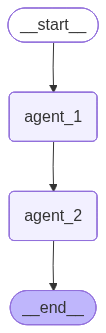

In [22]:
graph = workflow.compile()

print(type(graph))

graph

In [23]:
mermaid_code = graph.get_graph().draw_mermaid()
print(mermaid_code)

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	agent_1(agent_1)
	agent_2(agent_2)
	__end__([<p>__end__</p>]):::last
	__start__ --> agent_1;
	agent_1 --> agent_2;
	agent_2 --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc

